In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('df_without_outliers.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df_new = df.copy()

In [4]:
scaler = StandardScaler()
df_transformed = scaler.fit_transform(df_new)

## K-mean Clustering the genre

In [5]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [6]:
sse = [] 
# fit the KMeans model to the data with a range of different numbers of clusters
for k in range(5, 50):
    kmeans = KMeans(init='k-means++',n_clusters=k, n_init=5, max_iter=100)
    kmeans.fit(df_transformed)
    sse.append(kmeans.inertia_)  # add the sum of squared distances 
sse

[1769290.4409606445,
 1705985.9901901747,
 1653231.4902190557,
 1611355.134244062,
 1559218.3298559282,
 1530129.487830806,
 1498297.638436576,
 1468691.015199922,
 1442231.4765830562,
 1417134.4647801523,
 1395839.3597194562,
 1376037.491274855,
 1358906.0378029032,
 1345151.0606817603,
 1331885.7667998062,
 1319147.010314392,
 1310041.242773593,
 1296276.6809808053,
 1288442.953010826,
 1277001.764284744,
 1266157.7687012567,
 1258234.1921115152,
 1248562.1501569238,
 1243711.3781051852,
 1233177.3363604706,
 1225244.7642612508,
 1217914.747247832,
 1212799.986171583,
 1207066.1986076743,
 1200447.791680572,
 1194909.4787032318,
 1187814.7286411542,
 1185597.98022003,
 1178702.809952256,
 1173360.3599168104,
 1166270.0632884407,
 1163917.7328270522,
 1161199.5394124603,
 1155350.4239625072,
 1149564.922203825,
 1144337.16011739,
 1141215.206278863,
 1136281.8631538646,
 1131602.7528390186,
 1127986.1374241926]

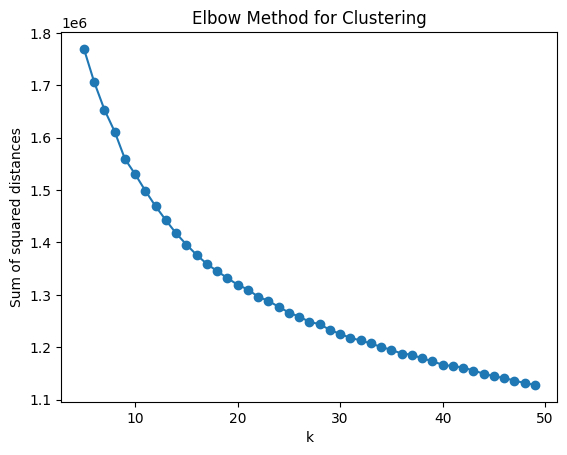

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(5, 50), sse, marker='o')
plt.title('Elbow Method for Clustering')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.show()

In [9]:
elbow = dict()
silhouette = dict()
for i in range(5, 50):
    kmeans = KMeans(init='k-means++', n_clusters=i)
    clusters = kmeans.fit_predict(df_transformed)
    elbow[i] = kmeans.inertia_
    silhouette[i] = silhouette_score(df_transformed, clusters)

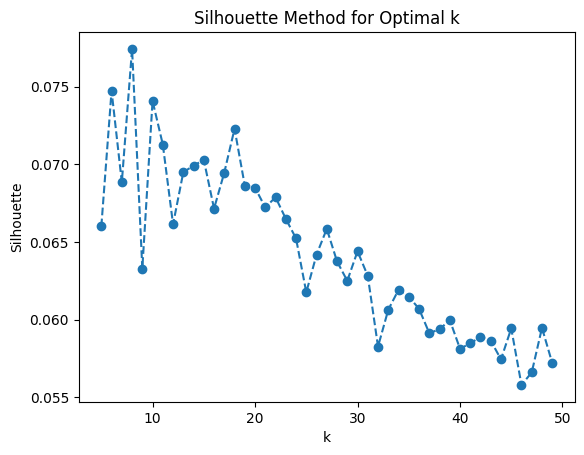

In [10]:
plt.plot(*zip(*silhouette.items()), marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.ylabel('Silhouette')
plt.xlabel('k');

In [11]:
# initialize the KMeans model 
kmeans = KMeans(n_clusters=15, random_state=1)
# fit the model to the data
kmeans.fit(df_transformed)

KMeans(n_clusters=15, random_state=1)

In [12]:
clusters = kmeans.predict(df_transformed)

In [13]:
labels, counts = np.unique(clusters, return_counts=True)
print(labels, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [  899  4071  8266   874  6389  5332  9007  5655 10340  7628  8674  4718
  8710  7368  1410]


In [14]:
df_new_1 = df.copy()

In [15]:
df_new_1['cluster'] = clusters

In [16]:
df_new_1

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers,cluster
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05,6
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05,7
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05,8
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05,7
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89336,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07,4
89337,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04,4
89338,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07,4
89339,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04,10


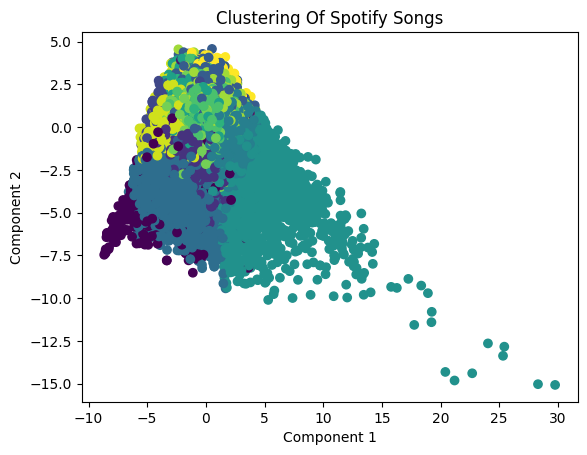

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# to visualize the generated clusters, we will first need to reduce the data to two dimensions
# so that we can plot it on a scatter plot

pca = PCA(n_components=2)  # initialize a PCA model with 2 components
df_2d = pca.fit_transform(df_transformed)  # reduce the data to two dimensions using the PCA model

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=clusters)
plt.title('Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## Popularity Class

In [18]:
def classify_popularity(popularity):
    if popularity <= 40:
        return 'low'
    elif 40 < popularity <= 70:
        return 'medium'
    else:
        return 'high'

df_new['popularity_class'] = df_new['popularity'].apply(classify_popularity)

In [19]:
df_new['popularity_class'].value_counts()

popularity_class
low       57182
medium    29159
high       3000
Name: count, dtype: int64

In [20]:
df_new.drop(columns=['popularity'], inplace=True)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [23]:
X = df_new.drop(columns=['popularity_class']).values
y = np.array(df_new['popularity_class'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

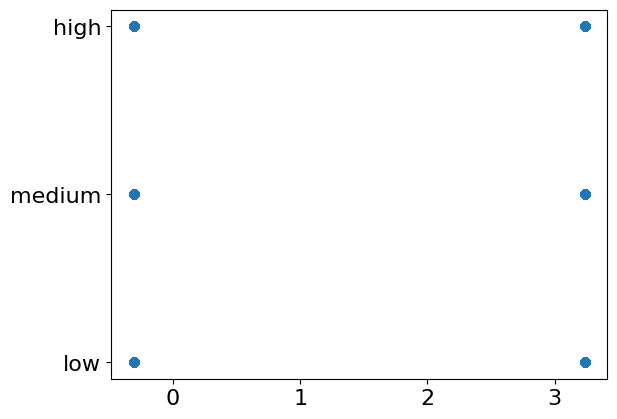

In [27]:
plt.scatter(X_train.T[0], y_train)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [29]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1,10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # note: 'elasticnet' requires 'solver' to be 'saga'
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['none', 'balanced']}  # 'liblinear' supports only 'l1' and 'l2'}

In [30]:
# initialize the LogisticRegression model
log_reg = LogisticRegression(max_iter=100)

# do GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\minhd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.6399469792279291


In [31]:
clf = LogisticRegression(random_state=42, C=0.001, class_weight= 'balanced', penalty='l2', solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [32]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6366451516621274
F1-score [0.2780651  0.75753736 0.45826214]
              precision    recall  f1-score   support

        high       0.19      0.50      0.28       919
         low       0.76      0.75      0.76     17064
      medium       0.50      0.43      0.46      8820

    accuracy                           0.64     26803
   macro avg       0.48      0.56      0.50     26803
weighted avg       0.65      0.64      0.64     26803



In [33]:
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

0.7906410471986259


In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()
plt.figure(figsize=(6, 4))
# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

ModuleNotFoundError: No module named 'scikitplot'

## Mode Class

In [ ]:
df_new_2= df.copy()

In [ ]:
df_new_2['mode'].value_counts()

In [ ]:
X_mode = df_new_2.drop(columns=['mode']).values
y_mode = np.array(df_new_2['mode'])

In [ ]:
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(
    X_mode, y_mode, test_size=0.3, random_state=100)

In [ ]:
scl = StandardScaler()
X_train_mode = scl.fit_transform(X_train_mode)
X_test_mode = scl.transform(X_test_mode)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1,10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Note: 'elasticnet' requires 'solver' to be 'saga'
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['none', 'balanced']}  # 'liblinear' supports only 'l1' and 'l2'}

In [ ]:
# initialize the LogisticRegression model
log_reg = LogisticRegression(max_iter=100)

# do GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_mode, y_train_mode)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

In [ ]:
clf_mode = LogisticRegression(random_state=42,C= 0.1, class_weight= 'balanced', penalty= 'l2', solver= 'saga')
clf_mode.fit(X_train_mode, y_train_mode)

In [ ]:
y_pred_mode = clf_mode.predict(X_test_mode)

print('Accuracy %s' % accuracy_score(y_test_mode, y_pred_mode))
print('F1-score %s' % f1_score(y_test_mode, y_pred_mode, average=None))
print(classification_report(y_test_mode, y_pred_mode))

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, classification_report

y_score_mode = clf_mode.predict_proba(X_test_mode)[:, 1]  # Get the probabilities for the positive class

# compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_mode, y_score_mode)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_auc